# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** M. Raja Inal Lubis
- **Email:** inalr6305@gmail.com
- **ID Dicoding:** rajainal3393

## Konteks Dataset

Kota **Washington, D.C.** yang merupakan ibu kota dari Amerika Serikat, terdapat sebuah bisnis penyewaan sepeda bernama *Capital Bikeshare DC*. Sistem penyewaan sepeda merupakan generasi terbaru dari penyewaan sepeda tradisional di mana seluruh keanggotaan, penyewaan, dan pengembalian secara otomatis.

Saat ini, terdapat lebih dari 500 program penyewaan sepeda di seluruh dunia mencakup hingga 500 ribu sepeda. Melihat dengan besarnya minat dan potensi bisnis dari penyewaan sepeda ini, karakteristik data yang dihasilkan oleh program ini menarik untuk penelitian. Dataset ini berfokus pada korelasi antara kondisi lingkungan dan musim dalam rentang per-jam, per-hari, dan per-bulan terhadap perilaku penyewaan. Data direkam dari tahun 2011 hingga 2012.

Hasil analisis data penyewaan sepeda ini dapat menghasilkan *insight* baru untuk pengembangan atau *improvement* dalam bisnis penyewaan sepeda.

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran tipe konsumen penyewaan sepeda ?
- Bagaimana perkembangan jumlah penyewaan sepeda dari tahun 2011 ke 2012 ?
- Bagaimana pengaruh hari libur dan *working day* terhadap jumlah penyewaan sepeda ?
- Pada jam berapa yang merupakan puncak tingginya jumlah penyewaan sepeda ?
- Pada musim dan kondisi cuaca seperti apa yang menjadi titik terendah jumlah penyewaan sepeda ?
- Bagaimana korelasi parameter cuaca terhadap jumlah penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

## Data Wrangling

### Gathering Data

Dataset didapatkan dari situs Kaggle : https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data

Informasi lainnya tentang dataset ini : https://capitalbikeshare.com/system-data dan http://www.freemeteo.com

In [ ]:
from google.colab import files
upload = files.upload()

Saving Bike Sharing Dataset.zip to Bike Sharing Dataset (1).zip


In [ ]:
with ZipFile("/content/Bike Sharing Dataset.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Features information

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Assessing day_df**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil informasi dari method info(), tidak ada missing value di dalam dataset.



*   Kolom **instant** akan di drop karena tidak memberikan informasi apapun.
*   Kolom **season, yr, mnth, holiday, weekday, workingday,dan weathersit** bertipe int. Kolom tersebut akan di ubah menjadi object untuk lebih memudahkan pemahaman data.
*   Kolom **dteday** bertipe object, akan di ubah menjadi datetime untuk memudahkan visualisasi data.
*   Kolom **dteday, yr, mnth, temp, hum, dan cnt** akan di rename untuk memudahkan pemahaman data.



In [ ]:
check_duplicated = day_df.duplicated().sum()
print("Jumlah data duplikat : ", check_duplicated)

Jumlah data duplikat :  0


Tidak ada duplikasi data di day_df.

In [ ]:
day_df.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
day_df.shape

(731, 16)

Intances data berjumlah 731 dan features berjumlah 16.

**Assessing hour_df**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil informasi dari method info(), tidak ada missing value di dalam dataset.

*   Kolom **instant** akan di drop karena tidak memberikan informasi apapun.
*   Kolom **season, yr, mnth, holiday, weekday, workingday,dan weathersit** bertipe int. Kolom tersebut akan di ubah menjadi object untuk lebih memudahkan pemahaman data.
*   Kolom **dteday** bertipe object, akan di ubah menjadi datetime untuk memudahkan visualisasi data.
*   Kolom **dteday, yr, mnth, hr, temp, hum, dan cnt** akan di rename untuk memudahkan pemahaman data.

In [ ]:
check_duplicated_hour = hour_df.duplicated().sum()
print("Jumlah data duplikat : ", check_duplicated_hour)

Jumlah data duplikat :  0


Tidak ada duplikasi data di hour_df.

In [ ]:
hour_df.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
hour_df.shape

(17379, 17)

Intances data berjumlah 17379 dan features berjumlah 17.

### Cleaning Data

**Cleaning day_df**



Rename day_df columns



In [ ]:
day_df = day_df.rename(columns = {
    "dteday" : "date", "yr" : "year",
    "mnth" : "month","temp" : "temperature",
    "hum" : "humidity", "cnt" : "count"
    })

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df = day_df.drop(columns = ["instant"])

Kolom **instant** di drop karena tidak memberikan informasi apapun.

In [ ]:
day_df["date"] = pd.to_datetime(day_df["date"])

caterogical_columns = ["season", "year", "month", "holiday", "weekday", "workingday", "weathersit"]
for convert in caterogical_columns:
  day_df[convert] = day_df[convert].astype("str")



*   Kolom **date** diubah menjadi tipe data datetime
*   List yang ada di **caterogical_columns** diubah menjadi object



In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         731 non-null    datetime64[ns]
 1   season       731 non-null    object        
 2   year         731 non-null    object        
 3   month        731 non-null    object        
 4   holiday      731 non-null    object        
 5   weekday      731 non-null    object        
 6   workingday   731 non-null    object        
 7   weathersit   731 non-null    object        
 8   temperature  731 non-null    float64       
 9   atemp        731 non-null    float64       
 10  humidity     731 non-null    float64       
 11  windspeed    731 non-null    float64       
 12  casual       731 non-null    int64         
 13  registered   731 non-null    int64         
 14  count        731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
mem

Berdasarkan hasil informasi dari method info(), tipe-tipe kolom sudah sesuai.

Selanjutnya, jika kamu sadari. Sebelum kolom seperti **season, year, month, holiday, weekday, workingday, weathersit** diubah tipe datanya, kolom-kolom tersebut berisi angka. Misalnya kolom **season = [1 == spring; 2 == summer; 3 == fall; 4 == winter]**, hal tersebut akan diubah untuk lebih memudahkan pemahaman data. Perubahan data tersebut didasarkan dari dokumentasi dataset.

In [ ]:
day_df["season"].replace({"1" : "spring", "2" : "summer",
                          "3" : "fall", "4" : "winter"}, inplace = True)

day_df["year"].replace({"0" : "2011", "1" : "2012"}, inplace = True)

day_df["month"].replace({"1" : "january", "2" : "february", "3" : "march",
                        "4" : "april", "5" : "may", "6" : "june",
                        "7" : "july", "8" : "august", "9" : "september",
                        "10" : "october", "11" : "november", "12" : "desember"}, inplace = True)

day_df["holiday"].replace({"1" : "holiday", "0" : "not holiday"}, inplace = True)

day_df["weekday"].replace({"1" : "monday", "2" : "tuesday", "3" : "wednesday", "4" : "thursday",
                           "5" : "friday", "6" : "saturday", "0" : "sunday"}, inplace = True)

day_df["workingday"].replace({"1" : "working day", "0" : "weekend/holiday"}, inplace = True)

day_df["weathersit"].replace({"1" : "clear", "2" : "mist", "3" : "light snow", "4" : "heavy rain"}, inplace = True)

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,2011,january,not holiday,saturday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,january,not holiday,sunday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,january,not holiday,monday,working day,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,january,not holiday,tuesday,working day,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,january,not holiday,wednesday,working day,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data sudah mudah dipahami sekarang.

**Cleaning hour_df**

Rename hour_df columns

In [ ]:
hour_df = hour_df.rename(columns = {
    "dteday" : "date", "yr" : "year",
    "mnth" : "month", "hr" : "hour",
    "temp" : "temperature", "hum" : "humidity",
    "cnt" : "count"
    })

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df = hour_df.drop(columns = ["instant"])

Kolom **instant** di drop karena tidak memberikan informasi apapun.

In [ ]:
hour_df["date"] = pd.to_datetime(hour_df["date"])

caterogical_columns = ["season", "year", "month", "holiday", "weekday", "workingday", "weathersit"]
for convert in caterogical_columns:
  hour_df[convert] = hour_df[convert].astype("str")

*   Kolom **date** diubah menjadi tipe data datetime
*   List yang ada di **caterogical_columns** diubah menjadi object

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17379 non-null  datetime64[ns]
 1   season       17379 non-null  object        
 2   year         17379 non-null  object        
 3   month        17379 non-null  object        
 4   hour         17379 non-null  int64         
 5   holiday      17379 non-null  object        
 6   weekday      17379 non-null  object        
 7   workingday   17379 non-null  object        
 8   weathersit   17379 non-null  object        
 9   temperature  17379 non-null  float64       
 10  atemp        17379 non-null  float64       
 11  humidity     17379 non-null  float64       
 12  windspeed    17379 non-null  float64       
 13  casual       17379 non-null  int64         
 14  registered   17379 non-null  int64         
 15  count        17379 non-null  int64         
dtypes: d

Berdasarkan hasil informasi dari method info(), tipe-tipe kolom sudah sesuai.

Selanjutnya, sama seperti day_df. Sebelum kolom seperti **season, year, month, holiday, weekday, workingday, weathersit** diubah tipe datanya, kolom-kolom tersebut berisi angka. Misalnya kolom **season = [1 == spring; 2 == summer; 3 == fall; 4 == winter]**, hal tersebut akan diubah untuk lebih memudahkan pemahaman data. Perubahan data tersebut didasarkan dari dokumentasi dataset.

In [ ]:
hour_df["season"].replace({"1" : "spring", "2" : "summer",
                          "3" : "fall", "4" : "winter"}, inplace = True)

hour_df["year"].replace({"0" : "2011", "1" : "2012"}, inplace = True)

hour_df["month"].replace({"1" : "january", "2" : "february", "3" : "march",
                        "4" : "april", "5" : "may", "6" : "june",
                        "7" : "july", "8" : "august", "9" : "september",
                        "10" : "october", "11" : "november", "12" : "desember"}, inplace = True)

hour_df["holiday"].replace({"1" : "holiday", "0" : "not holiday"}, inplace = True)

hour_df["weekday"].replace({"1" : "monday", "2" : "tuesday", "3" : "wednesday", "4" : "thursday",
                           "5" : "friday", "6" : "saturday", "0" : "sunday"}, inplace = True)

hour_df["workingday"].replace({"1" : "working day", "0" : "weekend/holiday"}, inplace = True)

hour_df["weathersit"].replace({"1" : "clear", "2" : "mist", "3" : "light snow", "4" : "heavy rain"}, inplace = True)

hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,2011,january,0,not holiday,saturday,weekend/holiday,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,spring,2011,january,1,not holiday,saturday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,spring,2011,january,2,not holiday,saturday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,spring,2011,january,3,not holiday,saturday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,spring,2011,january,4,not holiday,saturday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,0,1,1


Data sudah mudah dipahami sekarang.

## Exploratory Data Analysis (EDA)

**EDA day_df**

In [ ]:
day_df.describe(include = "all")

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,2012,january,not holiday,saturday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Informasi yang didapat dari deskripsi statistik:



*   Penyewaan paling sedikit dari casual user berjumlah 2 sepeda dan registered user berjumlah 20 sepeda.
*   Penyewaan paling banyak dari casual user berjumlah 3410 sepeda dan registered user berjumlah 6946 sepeda. Hal tersebut menandakan user kebanyakan dari golongan registered.
*   Musim yang paling banyak direkam adalah fall dan cuaca yang paling banyak direkam adalah clear.



In [ ]:
day_df.groupby(by = "year").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                           
         sum        sum   max  min         mean      sum
year                                                    
2011  247252     995851  6043  431  3405.761644  1243103
2012  372765    1676811  8714   22  5599.934426  2049576

Berdasarkan pivot_table diatas. Tren penyewaan sepeda memiliki kenaikan dari tahun 2011 hingga 2012, menandakan bahwa bisnis penyewaan sepeda ini memiliki minat yang semakin tinggi.

In [ ]:
day_df.groupby(by = ["year", "month"]).agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                           
                  sum        sum   max   min         mean     sum
year month                                                       
2011 april      22346      72524  5312   795  3162.333333   94870
     august     28842     107849  5895  1115  4409.387097  136691
     desember    8448      78875  3940   705  2816.870968   87323
     february    6242      41973  2927  1005  1721.964286   48215
     january     3073      35116  1985   431  1231.903226   38189
     july       36452     104889  6043  3285  4559.387097  141341
     june       30612     112900  5515  3767  4783.733333  143512
     march      12826      51219  3239   605  2065.967742   64045
     may        31050     104771  5805  2633  4381.322581  135821
     november   15594      86573  4486  1495  3405.566667  102167
     october    25222      98289  5511   627  3984.225806  123511
     september  26545     100873  5423  1842  4247.266667  127418
2012 april      38456     135768  7460  1027  5807.466667  174224
     august     43197     171306  7865  4549  6919.451613  214503
     desember   13245     110468  6606   441  3990.741935  123713
     february    8721      94416  5062  1529  3556.448276  103137
     january     8969      87775  4521  1301  3120.774194   96744
     july       41705     161902  8173  4459  6567.967742  203607
     june       43294     159536  8120  4127  6761.000000  202830
     march      31618     133257  8362  3194  5318.548387  164875
     may        44235     151630  8294  2843  6318.225806  195865
     november   21009     131655  6852  2277  5088.800000  152664
     october    34538     164303  8156    22  6414.225806  198841
     september  43778     174795  8714  4073  7285.766667  218573

Melihat tren penyewaan sepeda dalam range per-bulan, pada tahun 2011 bulan juni memiliki jumlah penyewaan berjumlah 143512 sepeda. Pada tahun 2012 bulan agustus memiliki jumlah penyewaan berjumlah 214503 sepeda.

*   Puncak penyewaan pada tahun 2011 untuk registered user berada pada bulan juni dengan jumlah 112900 sepeda. Sedangkan puncak penyewaan registered user untuk tahun 2012 berada pada bulan september dengan jumlah 174795 sepeda.
*   Puncak penyewaan pada tahun 2011 untuk casual user berada pada bulan juli dengan jumlah 36452 sepeda. Sedangkan puncak penyewaan casual user untuk tahun 2012 berada pada bulan mei dengan jumlah 44235 sepeda.

In [ ]:
day_df.groupby(by = "weekday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                           
              sum        sum   max   min         mean     sum
weekday                                                      
friday      78238     409552  8362  1167  4690.288462  487790
monday      70784     384719  7525    22  4338.123810  455503
saturday   153852     323955  8714   627  4550.542857  477807
sunday     140521     303506  8227   605  4228.828571  444027
thursday    61460     423935  7804   431  4667.259615  485395
tuesday     57843     411266  7767   683  4510.663462  469109
wednesday   57319     415729  8173   441  4548.538462  473048

Melihat tren penyewaan sepeda dalam range per-hari. Jumlah tertinggi penyewaan sepeda berada di hari jum'at dengan jumlah 487790 sepeda dengan rata-rata 4690 sepeda yang disewakan. Penyewaan sepeda oleh salah satu hari senin merupakan yang paling sedikit dengan jumlah 22 sepeda.

In [ ]:
day_df.groupby(by = "workingday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                           
                    sum        sum   max  min         mean      sum
workingday                                                         
weekend/holiday  316732     683537  8714  605  4330.168831  1000269
working day      303285    1989125  8362   22  4584.820000  2292410

Penyewaan sepeda lebih ramai pada hari sibuk/working day dibandingkan pada hari weekend/holiday.

In [ ]:
day_df.groupby(by = "holiday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                            
                sum        sum   max   min         mean      sum
holiday                                                         
holiday       22359      56076  7403  1000  3735.000000    78435
not holiday  597658    2616586  8714    22  4527.104225  3214244

Penyewaan sepeda lebih ramai pada hari biasa ketimbang hari libur. Hal tersebut mungkin terjadi karena pelanggan lebih memilih di rumah atau berliburan dengan transportasi yang lain.

**EDA hour_df**

In [ ]:
hour_df.describe(include = "all")

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,2012,may,NaN,not holiday,saturday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.groupby(by = ["holiday", "hour"]).agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                        
                    sum        sum   max min        mean     sum
holiday     hour                                                
holiday     0       304        903   159  11   57.476190    1207
            1       191        626   123  10   38.904762     817
            2       165        370    93   4   25.476190     535
            3        59        150    32   2   11.611111     209
            4        36         81    16   1    5.850000     117
            5        33        190    38   1   10.619048     223
            6        74        520   133   4   28.285714     594
            7       178       1547   387   6   82.142857    1725
            8       496       3085   597  11  170.523810    3581
            9       923       2672   397  28  171.190476    3595
            10     1504       2769   447  32  203.476190    4273
            11     1887       3332   485  64  248.523810    5219
            12     2086       3944   543  80  287.142857    6030
            13     2206       4063   566  93  298.523810    6269
            14     2188       3824   547  86  286.285714    6012
            15     1858       3710   460  87  265.142857    5568
            16     1828       3890   501  56  272.285714    5718
            17     1581       4575   712  50  293.142857    6156
            18     1262       4382   676  37  268.761905    5644
            19     1028       3629   522  28  221.761905    4657
            20      967       2770   551  29  177.952381    3737
            21      759       2288   584  26  145.095238    3047
            22      539       1747   502  11  108.857143    2286
            23      207       1009   183   2   57.904762    1216
not holiday 0      7071      30852   283   2   53.791489   37923
            1      4518      18829   168   1   33.210526   23347
            2      3247      12570   132   1   22.791066   15817
            3      1834       6131    79   1   11.730486    7965
            4       838       3473    28   1    6.367799    4311
            5       979      13059    66   1   20.169540   14038
            6      2943      51595   213   1   77.468750   54538
            7      7859     144587   596   1  215.929178  152446
            8     15265     242155   839   5  364.617564  257420
            9     21535     134308   426  14  220.740793  155843
            10    32285      89699   539   8  172.781870  121984
            11    41399     104702   663  10  206.941926  146101
            12    47632     130752   776   3  252.311174  178384
            13    50507     128143   760  11  252.330508  178650
            14    52901     116739   750  12  239.604520  169640
            15    52748     124833   750   7  250.820621  177581
            16    52006     170024   783  11  313.159379  222030
            17    52639     278065   976  15  466.437236  330704
            18    43234     260894   977  23  430.166902  304128
            19    34477     187655   743  11  314.189533  222132
            20    25411     135402   567  11  227.458274  160813
            21    19811     102587   398   6  173.123055  122398
            22    15661      77665   338   9  132.002829   93326
            23    10858      51867   256   6   88.719943   62725



*   Pada hari libur, puncak penyewaan sepeda berada di jam 13.00 dan terendah di jam 04.00.
*   Pada hari biasa, puncak penyewaan sepeda berada di jam 17.00 dan terendah di jam 04.00.



In [ ]:
hour_df.groupby(by = ["workingday", "hour"]).agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                        
                        sum        sum   max min        mean     sum
workingday      hour                                                
weekend/holiday 0      3829      17055   249   6   90.800000   20884
                1      2876      13111   168   4   69.508696   15987
                2      2371       9752   132   2   53.171053   12123
                3      1465       4386    79   2   25.775330    5851
                4       514       1362    28   1    8.264317    1876
                5       383       1546    55   1    8.689189    1929
                6       875       3417   133   1   18.742358    4292
                7      1988       8039   387   1   43.406926   10027
                8      4718      19688   597   5  105.653680   24406
                9     10399      29246   397  14  171.623377   39645
                10    18311      40804   539  12  255.909091   59115
                11    24637      48201   663  27  315.316017   72838
                12    29163      55443   776  32  366.259740   84606
                13    31514      54587   760  30  372.731602   86101
                14    32246      51987   750  23  364.645022   84233
                15    31532      51354   750   7  358.813853   82886
                16    29710      51770   783  11  352.727273   81480
                17    25829      48911   731  15  323.549784   74740
                18    19371      45272   676  23  281.056522   64643
                19    15076      38209   554  11  231.673913   53285
                20    10756      29434   551  11  174.739130   40190
                21     8314      24360   584   7  142.060870   32674
                22     6453      20241   502   9  116.060870   26694
                23     4402      15362   239   2   85.930435   19764
working day     0      3546      14700   283   2   36.786290   18246
                1      1833       6344   114   1   16.552632    8177
                2      1041       3188    74   1    8.683778    4229
                3       428       1895    36   1    4.942553    2323
                4       360       2192    17   1    5.429787    2552
                5       629      11703    66   1   24.913131   12332
                6      2142      48698   213   7  102.500000   50840
                7      6049     138095   596  18  290.612903  144144
                8     11043     225552   839  31  477.006048  236595
                9     12059     107734   426  23  241.518145  119793
                10    15478      51664   275   8  135.366935   67142
                11    18649      59833   361  10  158.229839   78482
                12    20555      79253   471   3  200.820926   99808
                13    21199      77619   428  11  198.429719   98818
                14    22843      68576   651  12  183.572289   91419
                15    23074      77189   601  13  201.331325  100263
                16    24124     122144   634  13  293.122244  146268
                17    28391     233729   976  26  525.290581  262120
                18    25125     220004   977  26  492.226908  245129
                19    20429     153075   743  18  348.401606  173504
                20    15622     108738   567  23  249.718876  124360
                21    12256      80515   398   6  186.287149   92771
                22     9747      59171   321  11  138.389558   68918
                23     6663      37514   256   9   88.708835   44177

*   Pada hari libur/akhir pekan, puncak penyewaan sepeda berada di jam 13.00 dan terendah di jam 04.00.
*   Pada hari kerja, puncak penyewaan sepeda berada di jam 17.00 dan terendah di jam 04.00.

In [ ]:
hour_df.groupby(by = ["season", "weathersit"]).agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                        
                      sum        sum   max min        mean     sum
season weathersit                                                 
fall   clear       174014     627927   977   1  244.494207  801941
       light snow    9727      36529   891   1  171.955390   46256
       mist         42350     170582   868   2  224.848997  212932
spring clear        44462     280816   801   1  122.055535  325278
       heavy rain       8        215   164  23   74.333333     223
       light snow    1392      20250   520   1   58.650407   21642
       mist         14760     109445   712   1  103.074689  124205
summer clear       151197     513266   873   1  232.410983  664463
       light snow    7413      39350   782   1  115.179803   46763
       mist         44912     162451   957   1  181.261364  207363
winter clear        93072     453419   967   1  209.463779  546491
       light snow    4251      39419   856   1  116.453333   43670
       mist         32459     218993   905   1  201.483974  251452

Pada musim spring dengan kondisi cuaca **heavy rain** menjadi momen ketika jumlah penyewaan sepeda sangat sedikit hanya berjumlah 223 sepeda.

In [ ]:
hour_df.groupby(by = "weathersit").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : ["max", "min", "mean", "sum"]
})

casual registered count                         
               sum        sum   max min        mean      sum
weathersit                                                  
clear       462745    1875428   977   1  204.869272  2338173
heavy rain       8        215   164  23   74.333333      223
light snow   22783     135548   891   1  111.579281   158331
mist        134481     661471   957   1  175.165493   795952

## Visualization & Explanatory Analysis

### Bagaimana persebaran tipe konsumen penyewaan sepeda ?

In [ ]:
total_casual = day_df["casual"].sum()
total_registered = day_df["registered"].sum()
total_combine = day_df["casual"].sum() + day_df["registered"].sum()

total_consument = {
    "category" : ["casual", "registered", "combine"],
    "total" : [total_casual, total_registered, total_combine]
}

total_df = pd.DataFrame(total_consument)
total_df

,category,total
0,casual,620017
1,registered,2672662
2,combine,3292679


<BarContainer object of 3 artists>

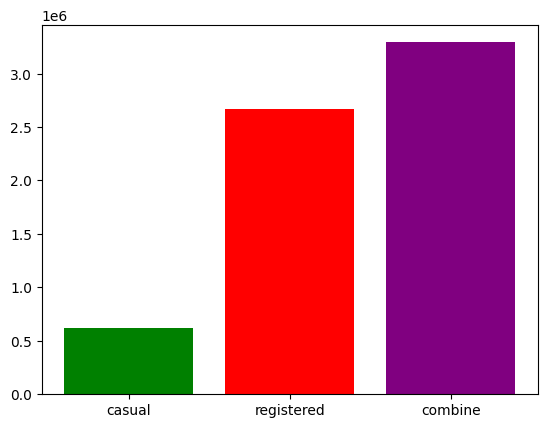

In [ ]:
plt.bar(total_df["category"], total_df["total"], color = ["green", "red", "purple"])

Berdasarkan visualisasi diatas, jumlah registered user jauh lebih banyak dari casual user. Ini menandakan hal yang baik untuk sebuah bisnis penyewaan sepeda.

In [ ]:
consument_distribution = day_df.groupby(by = "weekday").agg({
    "casual" : "sum",
    "registered" : "sum"
}).sort_values(by = ["casual", "registered"], ascending = False).reset_index()

consument_distribution

,weekday,casual,registered
0,saturday,153852,323955
1,sunday,140521,303506
2,friday,78238,409552
3,monday,70784,384719
4,thursday,61460,423935
5,tuesday,57843,411266
6,wednesday,57319,415729


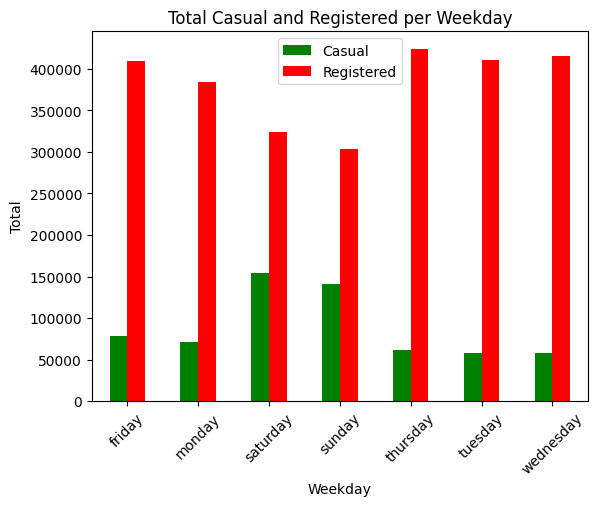

In [ ]:
grouped_df = consument_distribution.groupby("weekday")[["casual", "registered"]].sum()

ax = grouped_df.plot(kind = "bar", color = ["green", "red"])
plt.xlabel("Weekday")
plt.ylabel("Total")
plt.title("Total Casual and Registered per Weekday")
plt.xticks(rotation = 45)
ax.legend(["Casual", "Registered"])

plt.show()

Registered user paling banyak menyewa sepeda pada hari kamis, sedangkan untuk casual user paling banyak pada hari sabtu.

### Bagaimana perkembangan jumlah penyewaan sepeda dari tahun 2011 ke 2012 ?

In [ ]:
monthly_sharing_df = day_df.resample(rule = "M", on = "date").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum"
})

monthly_sharing_df.head()

,casual,registered,count
date,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


In [ ]:
monthly_sharing_df.index = monthly_sharing_df.index.strftime("%B-%Y")
monthly_sharing_df = monthly_sharing_df.reset_index()

monthly_sharing_df.head()

,date,casual,registered,count
0,January-2011,3073,35116,38189
1,February-2011,6242,41973,48215
2,March-2011,12826,51219,64045
3,April-2011,22346,72524,94870
4,May-2011,31050,104771,135821


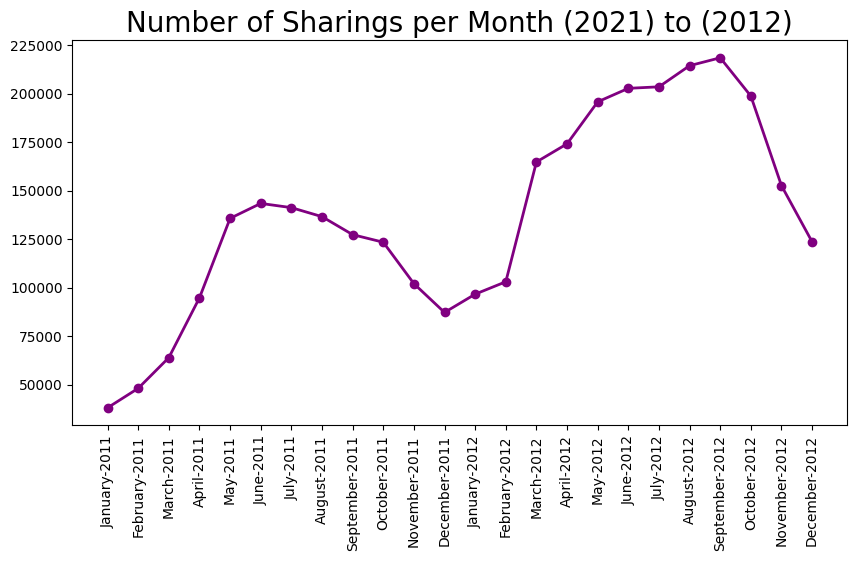

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sharing_df["date"], monthly_sharing_df["count"], marker = "o", linewidth = 2, color = "purple")
plt.title("Number of Sharings per Month (2021) to (2012)", loc = "center", fontsize = 20)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 90)
plt.yticks(fontsize = 10)
plt.show()

*   Tren penyewaan sepeda, untuk tahun 2011 memiliki kenaikan dari awal musim semi hingga akhir musim semi. Kemudian menurun ketika menuju musim panas, gugur, dan ke musim salju.
*   Untuk tahun 2012, kenaikan yang sangat signifikan ketika musim salju berakhir menuju ke musim semi. Hal tersebut bisa terjadi, menandakan bahwa musim semi kemungkinan memiliki kondisi cuaca yang sangat cocok untuk bersepeda dan kebanyakan warga Washington D.C. suka bersepeda di saat musim semi. Disisi lain, berarti tidak banyak yang suka bersepeda pada musim salju.
*   Perbedaan pada musim gugur di tahun 2012, merupakan puncak tertinggi penyewaan sepeda dan sangat berbanding terbalik dengan tahun 2011. Dan dengan pola yang sama, menuju musim salju maka penyewaan sepeda ikut menurun.  

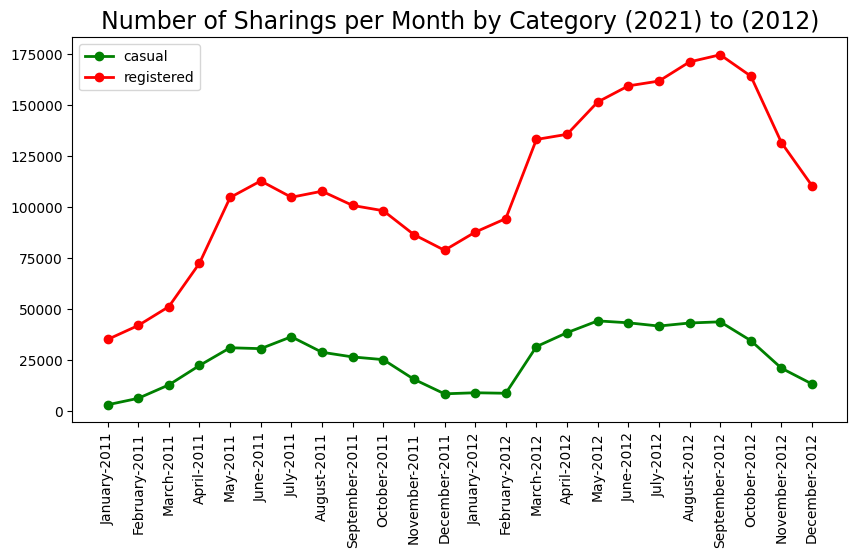

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sharing_df["date"], monthly_sharing_df["casual"], marker = "o", linewidth = 2, color = "green", label = "casual")
plt.plot(monthly_sharing_df["date"], monthly_sharing_df["registered"], marker = "o", linewidth = 2, color = "red", label = "registered")
plt.title("Number of Sharings per Month by Category (2021) to (2012)", loc = "center", fontsize = 17)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 90)
plt.yticks(fontsize = 10)
plt.legend()
plt.show()

### Pada jam berapa yang merupakan puncak tingginya jumlah penyewaan sepeda ?

In [ ]:
hour_sharing_df = hour_df.groupby(by = "hour").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum"
}).reset_index()

hour_sharing_df

,hour,casual,registered,count
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


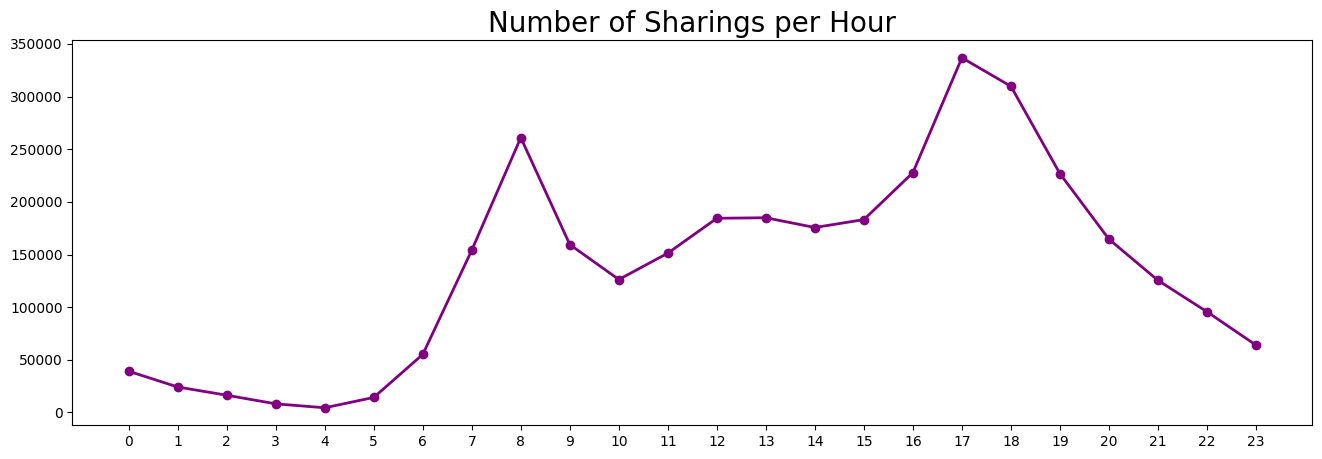

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(hour_sharing_df["hour"], hour_sharing_df["count"], marker = "o", linewidth = 2, color = "purple")
plt.title("Number of Sharings per Hour", loc = "center", fontsize = 20)
plt.xticks(hour_sharing_df["hour"], fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Penyewaan sepeda tertinggi berada di range jam 6 pagi hingga puncaknya pada pagi hari yaitu jam 8 pagi. Hal tersebut cukup masuk akal, karena jam tersebut adalah jam berangkat kerja. Kemudian meningkat lagi pada jam 5 sore yang merupakan puncaknya, kemungkinan karena jam tersebut adalah jam pulang kerja atau ada keperluan lain setelah pulang kerja seperti beli bahan makanan untuk makan malam, dsb.

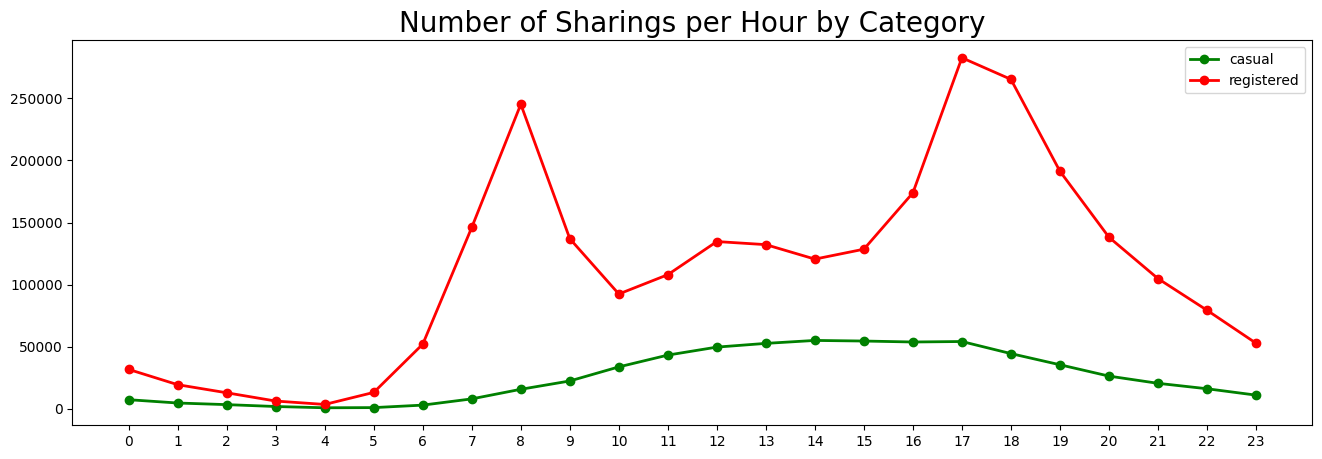

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(hour_sharing_df["hour"], hour_sharing_df["casual"], marker = "o", linewidth = 2, color = "green", label = "casual")
plt.plot(hour_sharing_df["hour"], hour_sharing_df["registered"], marker = "o", linewidth = 2, color = "red", label = "registered")
plt.title("Number of Sharings per Hour by Category", loc = "center", fontsize = 20)
plt.xticks(hour_sharing_df["hour"], fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend()
plt.show()

### Bagaimana pengaruh hari libur dan *working day* terhadap jumlah penyewaan sepeda ?

In [ ]:
holiday_sharing_df = day_df.groupby(by = "holiday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum"
}).reset_index()

holiday_sharing_df

,holiday,casual,registered,count
0,holiday,22359,56076,78435
1,not holiday,597658,2616586,3214244


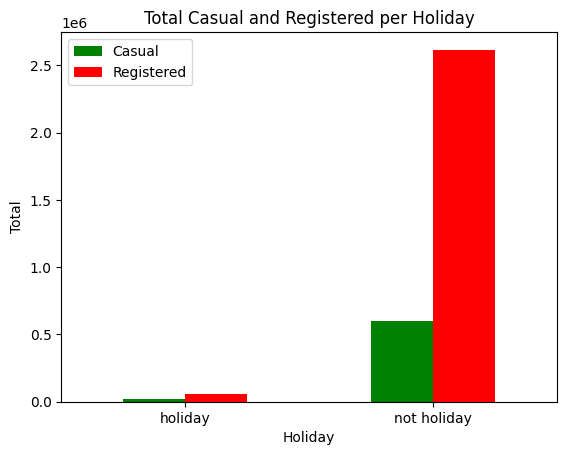

In [ ]:
holiday_data_df = holiday_sharing_df.groupby("holiday")[["casual", "registered"]].sum()

ax = holiday_data_df.plot(kind = "bar", color = ["green", "red"])
plt.xlabel("Holiday")
plt.ylabel("Total")
plt.title("Total Casual and Registered per Holiday")
plt.xticks(rotation = 0)
ax.legend(["Casual", "Registered"])

plt.show()

Hari libur menjadi momen dimana jumlah penyewaan sepeda sangat sedikit. Dengan perbandingan hari libur dan hari biasa yaitu 1 : 40. Kemungkinan karena pengguna bepergian/liburan dengan transportasi lain seperti bus, pesawat, dll yang memudahkan untuk perjalanan sangat jauh dan hanya sedikit pengguna yang stay di kota.

In [ ]:
working_sharing_df = day_df.groupby(by = "workingday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum"
}).reset_index()

working_sharing_df

,workingday,casual,registered,count
0,weekend/holiday,316732,683537,1000269
1,working day,303285,1989125,2292410


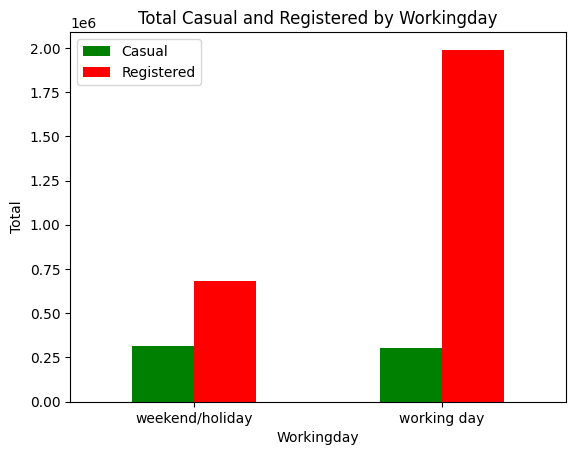

In [ ]:
working_data_df = working_sharing_df.groupby("workingday")[["casual", "registered"]].sum()

ax = working_data_df.plot(kind = "bar", color = ["green", "red"])
plt.xlabel("Workingday")
plt.ylabel("Total")
plt.title("Total Casual and Registered by Workingday")
plt.xticks(rotation = 0)
ax.legend(["Casual", "Registered"])

plt.show()

Hal unik terjadi disini, casual user menyewa sepeda sedikit lebih banyak pada hari libur/akhir pekan ketimbang hari kerja. Berbeda dengan registered user, hal tersebut mungkin menandakan motivasi dari tiap tipe user.
*   Tipe registered user mungkin menyewa sepeda dengan alasan pergi ke tempat kerja dengan biaya transportasi yang murah, lalu lintas yang padat pada hari kerja, dan pada hari libur/weekend kebanyakan dihabiskan dengan di rumah saja.
*   Tipe casual user mungkin cukup seimbang menyewa sepeda untuk keperluan sehari-hari dan hari kerja, mungkin juga casual user ini berasal dari pendatang di hari libur/akhir pekan.

### Pada musim dan kondisi cuaca seperti apa yang menjadi titik terendah jumlah penyewaan sepeda ?

In [ ]:
season_df = hour_df.groupby(by = "season")["count"].sum().sort_values(ascending=False).reset_index()
season_df

,season,count
0,fall,1061129
1,summer,918589
2,winter,841613
3,spring,471348


In [ ]:
weather_df = hour_df.groupby(by = "weathersit")["count"].sum().sort_values(ascending=False).reset_index()
weather_df

,weathersit,count
0,clear,2338173
1,mist,795952
2,light snow,158331
3,heavy rain,223


<ipython-input-56-09db93acdb87>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "count", y = "season", data = season_df, palette = colors, ax = ax[0])
<ipython-input-56-09db93acdb87>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x = "count", y = "season", data = season_df, palette = colors, ax = ax[0])
<ipython-input-56-09db93acdb87>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "count", y = "weathersit", data = weather_df, palette = colors, ax = ax[1])
<ipython-input-56-09db93acdb87>:11: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x = "count", y = "

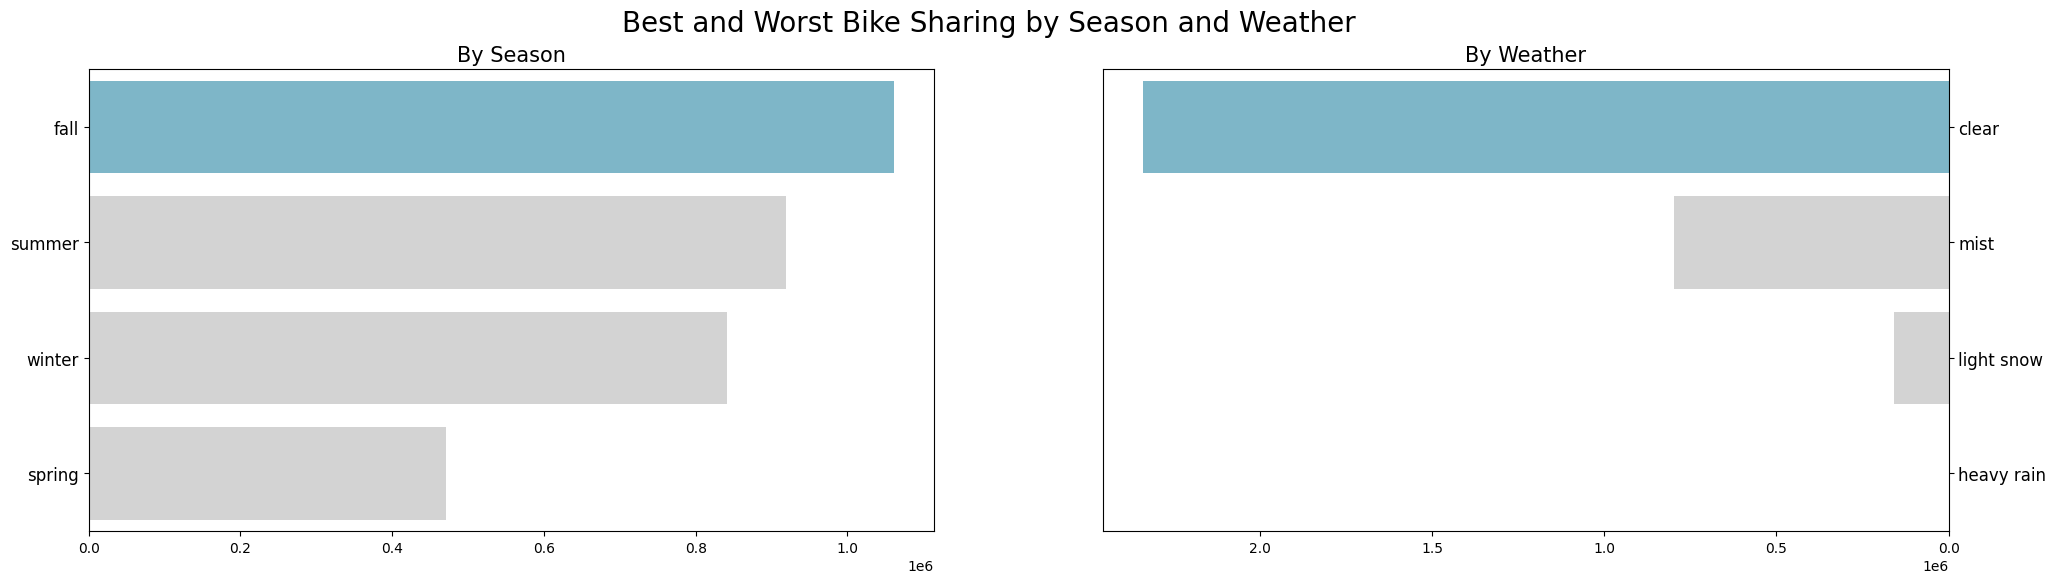

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x = "count", y = "season", data = season_df, palette = colors, ax = ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Season", loc = "center", fontsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 12)

sns.barplot(x = "count", y = "weathersit", data = weather_df, palette = colors, ax = ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("By Weather", loc = "center", fontsize = 15)
ax[1].tick_params(axis = 'y', labelsize = 12)

plt.suptitle("Best and Worst Bike Sharing by Season and Weather", fontsize = 20)
plt.show()

Musim gugur menjadi menjadi musim favorit untuk menyewakan sepeda. Hal tersebut mungkin terjadi karena suhu yang stabil, kelembapan rendah, dan kecepatan angin yang stabil. Bersamaan dengan cuaca yang **clear** juga menjadi cuaca paling disukai untuk bersepeda.

### Bagaimana korelasi parameter cuaca terhadap jumlah penyewaan sepeda ?

In [ ]:
weather_parameter_df = hour_df.groupby(by = ["temperature", "atemp", "humidity", "windspeed"]).agg({
    "count" : "sum"
}).reset_index()

weather_parameter_df

,temperature,atemp,humidity,windspeed,count
0,0.02,0.0000,0.44,0.3284,27
1,0.02,0.0152,0.34,0.2836,2
2,0.02,0.0152,0.44,0.2836,8
3,0.02,0.0152,0.48,0.2985,3
4,0.02,0.0303,0.44,0.2239,2
...,...,...,...,...,...
6914,0.96,0.9091,0.36,0.1642,312
6915,0.96,0.9091,0.36,0.2239,233
6916,0.96,1.0000,0.48,0.2985,101
6917,0.98,0.9242,0.34,0.1940,539


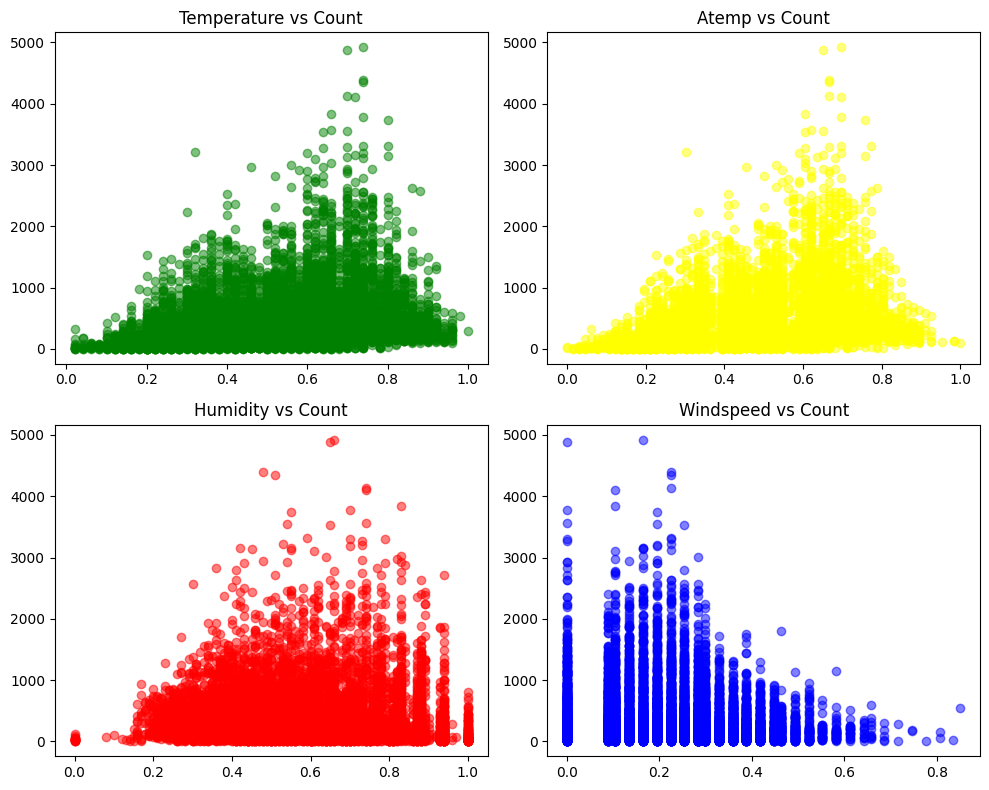

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

colors = ['green', 'yellow', 'red', 'blue']

axs[0, 0].scatter(weather_parameter_df['temperature'], weather_parameter_df['count'], color=colors[0], alpha=0.5)
axs[0, 0].set_title('Temperature vs Count')

axs[0, 1].scatter(weather_parameter_df['atemp'], weather_parameter_df['count'], color=colors[1], alpha=0.5)
axs[0, 1].set_title('Atemp vs Count')

axs[1, 0].scatter(weather_parameter_df['humidity'], weather_parameter_df['count'], color=colors[2], alpha=0.5)
axs[1, 0].set_title('Humidity vs Count')

axs[1, 1].scatter(weather_parameter_df['windspeed'], weather_parameter_df['count'], color=colors[3], alpha=0.5)
axs[1, 1].set_title('Windspeed vs Count')

plt.tight_layout()
plt.show()

Parameter seperti temperatur dan atemp memiliki korelasi yang berkesesuaian dengan jumlah penyewaan sepeda, begitu juga dengan humidity tapi memiliki korelasi yang cukup kecil yaitu 0.05. Namun, ditunjukkan juga bahwa jumlah penyewaan sepeda dengan kecepatan angin ternyata tidak memiliki korelasi yang kuat.

In [ ]:
correlation_matrix = weather_parameter_df.corr()
print(correlation_matrix)

             temperature     atemp  humidity  windspeed     count
temperature     1.000000  0.982001 -0.128906  -0.039155  0.345677
atemp           0.982001  1.000000 -0.106347  -0.076979  0.354452
humidity       -0.128906 -0.106347  1.000000  -0.163219  0.048817
windspeed      -0.039155 -0.076979 -0.163219   1.000000 -0.207074
count           0.345677  0.354452  0.048817  -0.207074  1.000000


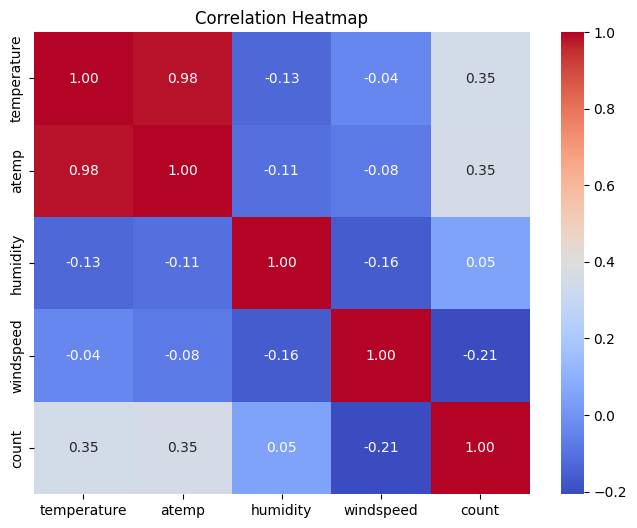

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)

## Conclusion

- Bagaimana persebaran tipe konsumen penyewaan sepeda ?

Pelanggan dari bisnis ini berbasis kuat pada pelanggan yang registered/terdaftar. Registered user paling aktif di hari kerja (kamis), sedangkan casual user paling aktif di akhir pekan (sabtu).

- Bagaimana perkembangan jumlah penyewaan sepeda dari tahun 2011 ke 2012 ?

Jumlah penyewaan sepeda di tahun 2012 berkembang jauh lebih tinggi dari tahun 2011. Dengan tren berdasarkan musim, penyewaan sepeda selalu naik dari musim salju ke musim semi. Hal tersebut karena kondisi cuaca yang mulai membaik dari musim salju ke musim semi. Perkembangan jumlah penyewaan juga menunjukkan perubahan perilaku penyewaan pada musim gugur karena puncak tertinggi penyewaan sepeda terjadi pada musim gugur tahun 2012, berbeda dengan tahun 2011 yang menunjukkan penurunan pada musim gugur.

- Bagaimana pengaruh hari libur dan *working day* terhadap jumlah penyewaan sepeda ?

Hari libur memiliki pengaruh yang sangat besar karena jumlah penyewaan sepeda pada hari libur sangat merosot, bisa terjadi karena kebanyakan pengguna berlibur dengan transportasi lain atau tidak stay di kota.

Hari kerja membagi pengguna terhadap motivasinya. Registered user cenderung menyewa sepeda pada hari kerja untuk pergi ke tempat kerja dengan biaya transportasi yang lebih murah dan menghindari lalu lintas yang padat pada hari kerja. Pada hari libur, kebanyakan dari registered user stay dirumah. Sedangkan Casual user memiliki motivasi yang lebih beragam dalam menyewa sepeda, termasuk liburan, bekerja, rekreasi, dan juga kemungkinan bahwa sekian persen dari casual user ini berasal dari pendatang sementara.

- Pada jam berapa yang merupakan puncak tingginya jumlah penyewaan sepeda ?

Jam dengan puncak tertinggi penyewaan sepeda pada jam 17.00 dan jam 08.00 diurutan kedua. Perilaku penyewaan sangat berpengaruh dengan aktivitas harian masyarakat. Dikarenakan penyewaan yang meningkat pada jam berangkat kerja dan jam pulang kerja, menurun pada jam istirahat, dan stabil di jam siang.

- Pada musim dan kondisi cuaca seperti apa yang menjadi titik terendah jumlah penyewaan sepeda ?

Musim gugur menjadi favorit karena faktor cuaca yang mendukung dengan suhu yang stabil, kelembapan rendah, dan kecepatan angin yang stabil menjadi faktor cuaca yang mendukung untuk aktivitas bersepeda. Cuaca yang paling disukai untuk bersepeda adalah cuaca yang "clear" atau cerah.

- Bagaimana korelasi parameter cuaca terhadap jumlah penyewaan sepeda ?

Temperatur dan atemp memiliki pengaruh terhadap jumlah penyewaan sepeda. Korelasi terhadap kelembapan dengan penyewaan sepeda cukup kecil, hal tersebut dapat menandakan dua hal yaitu kelembapan tidak memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda dan kelembapan yang tinggi tidak disukai pengguna. Terakhir, tidak terdapat korelasi yang kuat antara kecepatan angin dengan jumlah penyewaan sepeda. Artinya keputusan seseorang dalam menyewa sepeda dipengaruhi paling besar oleh temperature dan atemp.